<a href="https://colab.research.google.com/github/heysourin/Machine-Learning-Projects/blob/main/K-Means%20Clustering/From%20scratch/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
centroids = [(-5, -5), (5, 5)]
cluster_std = [1, 1]

In [3]:
X, y = make_blobs(n_samples = 100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

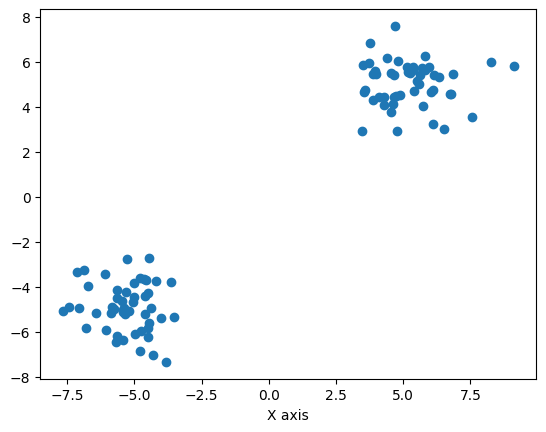

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X axis')
plt.show()

In [5]:
X.shape, y.shape

((100, 2), (100,))

# **K-Means from scratch**
- Steps:

    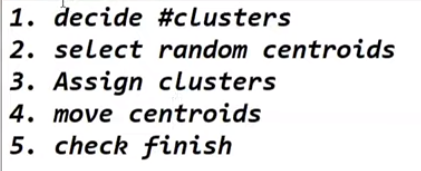

In [25]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


In [ ]:
"""
random.sample returns a list of unique elements chosen from the input sequence.
#1. Picking up random Numbers: Generates self.n_clusters numbers of random numbers in range of (0, X.shape)
#2. self.centroids = X[random_index]: getting the values at that index.
#3. Run loop:
          i.   assign cluster
          ii.  move centroid
          iii. check finish
"""

In [26]:
km = KMeans(n_clusters=2, max_iter=100)

In [27]:
km.fit_predict(X)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])